<h2> Compresia de imagini folosind descompunerea in valori singulara </h2>

In [1]:
%pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


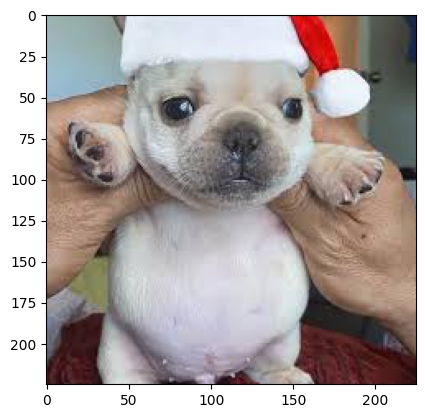

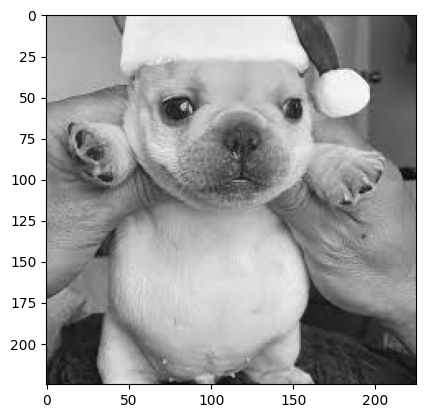

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Functie de conversie din RGB in GRAY
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Img = mpimg.imread('pibble.png') # remarca: matplotlib accepta doar imagini .png
fig1 = plt.figure(1)
plt.imshow(Img)

fig2 = plt.figure(2)
grayImg = rgb2gray(Img)
plt.imshow(grayImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.show()

Cerinta 1: Aplicati svd pe imaginea gray utilizand functian <b>np.linalg.svd</b>

In [ ]:
U, S, Vt = np.linalg.svd(grayImg, full_matrices=False)
# U: matricea stanga
# S: vectorul cu valori singulare
# Vt: matricea dreapta transpusa

print("--- SVD Result ---")
print(f"Shape of U:  {U.shape}")
print(f"Shape of S:  {S.shape}")
print(f"Shape of Vt: {Vt.shape}")

--- SVD Result ---
Shape of U:  (225, 225)
Shape of S:  (225,)
Shape of Vt: (225, 225)


Cerinta 2: Plotati valorile singulare obtinute la cerinta anterioara pe scala logaritmica utilizand <b>plt.semilogy</b>

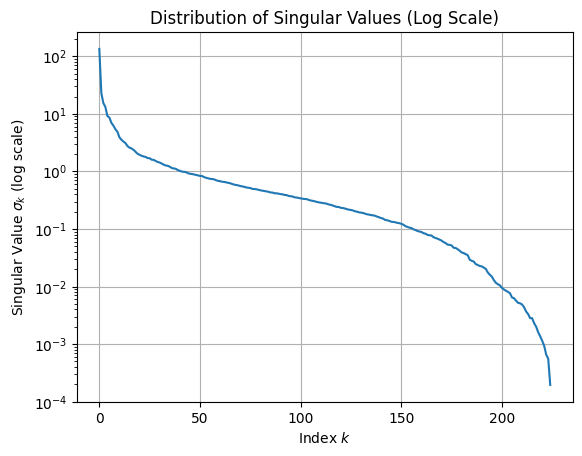

In [14]:
plt.figure()

plt.semilogy(S)

plt.title('Distribution of Singular Values (Log Scale)')
plt.xlabel('Index $k$')
plt.ylabel('Singular Value $\sigma_k$ (log scale)')
plt.grid(True)

plt.show()

Cerinta 3: Plotati graficul procent informatie vs valori singulare
(Hint: utilizati functia <b>np.cumsum</b>)

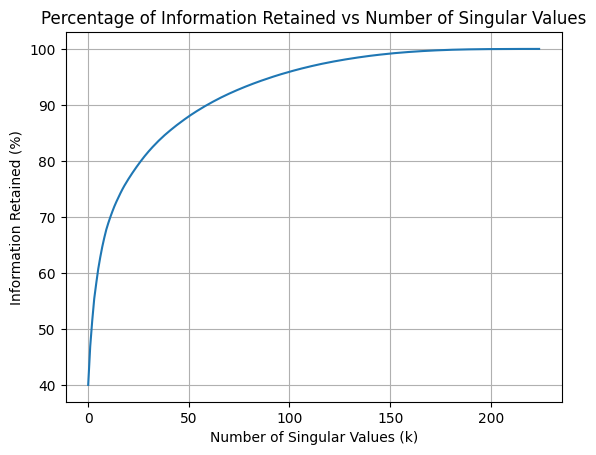

In [15]:
cumulative_s = np.cumsum(S)

total_s = np.sum(S)
percent_info = (cumulative_s / total_s) * 100

plt.figure()
plt.plot(percent_info)

plt.title('Percentage of Information Retained vs Number of Singular Values')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Information Retained (%)')
plt.grid(True)

plt.show()

Cerinta 4: In urma analizei graficului procent informatie vs valori singulare generati
un vector de dimensiune minim 5. Utilizati elementele vectorului pentru a reconstrui imaginile.

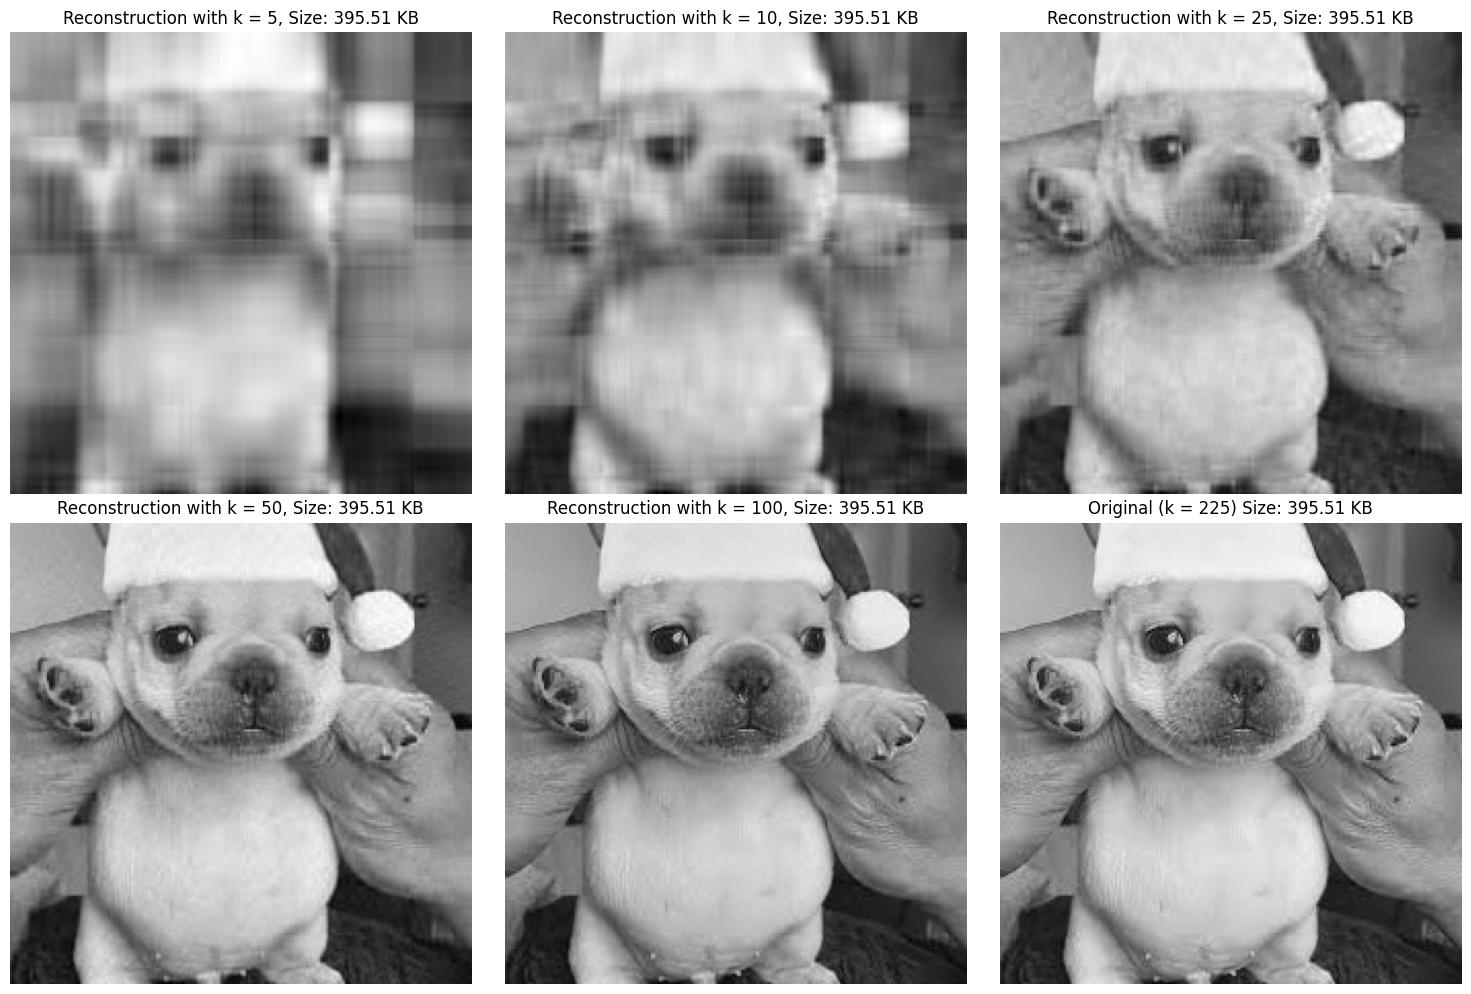

In [ ]:
k_values = [5, 10, 25, 50, 100] 

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
  # alegem primele k valori singulare si vectorii corespunzatori
  reconstructed_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

  # calculam memoria folosita pentru stocare
  nr_elements = U.shape[0] * k + k + Vt.shape[0] * k
  size_bytes = nr_elements * 8  # presupunand float64 (8 bytes per element)
  size_kb = size_bytes / 1024
  
  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstructed_img, cmap='gray')
  plt.title(f'Reconstruction with k = {k}, Size: {size_kb:.2f} KB')
  plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(grayImg, cmap='gray')
plt.title(f'Original (k = {len(S)}) Size: {grayImg.nbytes / 1024:.2f} KB')
plt.axis('off')

plt.tight_layout()
plt.show()